In [141]:
load('/home/nayan/Documents/Polymath/face-bijectors/sage-packages/Read.sage')
load('/home/nayan/Documents/Polymath/face-bijectors/sage-packages/GeneratePosets.sage')
load('/home/nayan/Documents/Polymath/face-bijectors/sage-packages/Equiv.sage')
load('/home/nayan/Documents/Polymath/face-bijectors/sage-packages/IntersectFacets.sage')

load('/home/nayan/Documents/Polymath/face-bijectors/sage-packages/GoodFromBad.sage')
load('/home/nayan/Documents/Polymath/face-bijectors/sage-packages/Prop313.sage')


In [2]:
def FacetPosets(m):
    p = '/home/nayan/Documents/Polymath/face-bijectors/data/'
    return [x.poset for x in KunzPoset.ReadFacesFromNormaliz(face_lattice_file_path=os.path.join(p,'m'+str(m)+'facet.fac'), hplane_file_path=os.path.join(p,'m'+str(m)+'.out'))]



def FacetPosets1(m):
    return ReadPosets(m, m-2)
def FacetRelations(m):
    return [P.relations() for P in FacetPosets(m)]

In [3]:
def RidgePosets(m):
    return ReadPosets(m,m-3)

In [4]:
#checks that if one equation is x_a+x_b = x_a+b then, the other is not of the form x_{a+b}+x_c = x_a or x_b
def ValidIntersections(FacetRel1, FacetRel2):
    for Relation in FacetRel1:
        if Relation[1] !=Relation[0] and [Relation[1], Relation[0]] in FacetRel2:
           # print(Relation)
            return False
    return True


In [5]:
def PossibleFacetIntersections(m):
    FacetRel = FacetRelations(m)
    I = [x for x in Combin(FacetRel, 2) if ValidIntersections(x[0], x[1])]
    return I

In [6]:
def PossibleRidgePosets(m):
    I = PossibleFacetIntersections(m)
    Ps=  []
    for Rel in I:
        NewRel = Rel[0]+Rel[1]
        P = Poset([[0..(m-1)], NewRel])
        if Diamond(P):
            Ps.append(P)
    return Ps

In [7]:
def BadRidgePosets(m):
    Poss = PossibleRidgePosets(m)
    Actual =RidgePosets(m)
    return [x for x in Poss if x not in Actual]

In [8]:
def ValidNIntersections(FacetRel):
    X = FacetRel
    while X!=[]:
        F1 = X[0]
        X = X[1:]
        for F in X:
            for Relation in F1:
                if Relation[1] !=Relation[0] and [Relation[1],Relation[0]] in F:
                    return False
    return True







def PossibleNIntersections(m,n):
    FacetRel = FacetRelations(m)
    I = [x for x in Combin(FacetRel,n) if ValidNIntersections(x)]
    return I






def PossibleNPosets(m,n):
    I = PossibleNIntersections(m,n)
    Ps = []
    for Rels in I:
        NewRel = CombLists(Rels)
        N = [x for x in NewRel if x[0]!=x[1]]
        NewRel = N
        if DiGraph(N).is_directed_acyclic():
            
            P = Poset([[0..(m-1)], NewRel])
            if Diamond(P):
                Ps.append(P)
    return Ps

    
def ActualNPosets(m,n):
    return ReadPosets(m, m-n-1)
    

In [12]:
 

def ReadRidge(m):
    p = '/home/nayan/Documents/Polymath/face-bijectors/data/'
    return [x.poset for x in KunzPoset.ReadFacesFromNormaliz(face_lattice_file_path=os.path.join(p,'m'+str(m)+'ridge.fac'), hplane_file_path=os.path.join(p,'m'+str(m)+'.out'))]

def ReadRidge1516(m):
    p = '/home/nayan/Downloads/'
    return [x.poset for x in KunzPoset.ReadFacesFromNormaliz(face_lattice_file_path=os.path.join(p,'m'+str(m)+'ridge.fac'), hplane_file_path=os.path.join(p,'m'+str(m)+'.out'))]




In [44]:
def poseteq(P,Q):
    if len(P.cover_relations()) == len(Q.cover_relations()):
        return True
    else:
        return False

In [45]:
for i in range (3, 13):
    X = equiv(ReadRidge(i), poseteq)
    print(len(X))

0
2
3
4
4
4
4
4
4
4


[Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite poset containing 12 elements,
 Finite pose

In [57]:
X81 = ReadPosets(8, numpy=True)

In [58]:
X82= ReadPosets(8)

In [68]:
%%time 
X91 = ReadPosets(10)

CPU times: user 17.7 s, sys: 13.5 ms, total: 17.7 s
Wall time: 17.7 s


In [69]:
%%time
X92 = ReadPosets(10, numpy=True)

CPU times: user 11.6 s, sys: 23.2 ms, total: 11.6 s
Wall time: 11.7 s


In [135]:
Bad9 = ArrayToPoset(np.load('m9_Bad.npy', allow_pickle=True),8)

In [136]:
len(Bad9)

776

In [109]:
Y = PartitionGFB(Bad8)

In [113]:
len(Y)

4

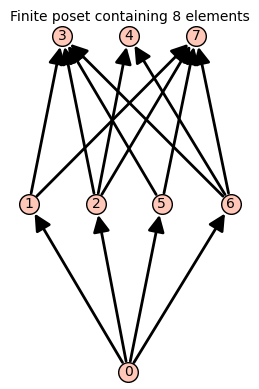

In [126]:
Y[3][1]

In [142]:
Bad9 = [x for x in Bad9 if Prop313(x)]

In [143]:
len(Bad9)

588

In [144]:
X = PartitionGFB(Bad9)

In [145]:
len(X)

42